In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles

In [63]:
datasets = {'moons':make_moons(n_samples=150,noise=0.1,random_state=0),
            'circles':make_circles(n_samples=150,noise=0.1,random_state=0,factor=0.2)}

In [56]:
colors=['red','blue']

In [57]:
def model_SVC(X,y,c,title):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    svc = LinearSVC(C=c)
    svc.fit(X_train,y_train)
    train_score = round(svc.score(X_train,y_train),2)
    test_score = round(svc.score(X_test,y_test),2)
    for idx,clas in enumerate(np.unique(y)):
        plt.scatter(X[y==clas,0],X[y==clas,1],c=colors[idx],alpha=0.5,label=clas)
        plt.scatter(X_test[y_test==clas,0],X_test[y_test==clas,1],c=colors[idx],alpha=1,label='{} test_set'.format(clas))
    plt.title("{} \nC:{} \ntrain_score:{} \ntest_score:{}".format(title,c,train_score,test_score))
    plt.legend(loc='best')
    

In [58]:
def plot_KPCA(dataset_name,kernel,gamma):
    X,y = datasets[dataset_name]
    X_std = StandardScaler().fit_transform(X)
    kpca = KernelPCA(n_components=2,kernel=kernel,gamma=gamma)
    X_transformed = kpca.fit_transform(X)
    return X,X_transformed,y

In [75]:
def plot_svm_classification(dataset_name,kernel,C,gamma):
    figure = plt.figure(figsize=(18, 16))
    plt.subplot(221)
    X,y = datasets[dataset_name]
    X_std = StandardScaler().fit_transform(X)
    model_SVC(X_std,y,1,'Original')
    X,X_KPCA_transformed,y = plot_KPCA(dataset_name,kernel,gamma)
    plt.subplot(222)
    model_SVC(X_KPCA_transformed,y,1,'KPCA with $\gamma$={}'.format(gamma))
    plt.show()

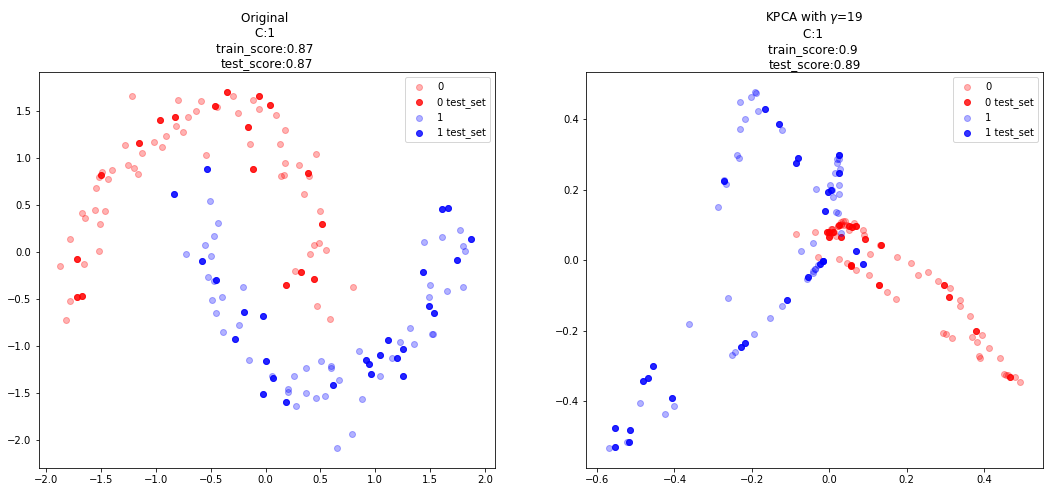

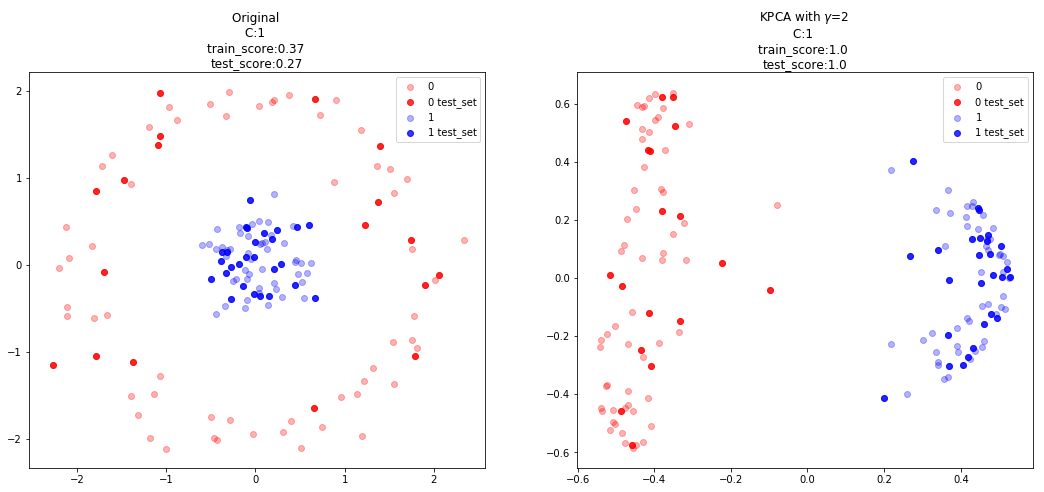

In [76]:
plot_svm_classification('moons','rbf',1,19)
plot_svm_classification('circles','rbf',1,2)

In [77]:
from ipywidgets import interact, FloatSlider, Dropdown

In [79]:
interact(plot_svm_classification,
        dataset_name=Dropdown(options=['moons','circles']),
        kernel=Dropdown(options=['rbf','sigmoid']),
        C=FloatSlider(min=0.001, max=10, step=0.001, value=1),
        gamma=FloatSlider(min=0.001, max=25, step=0.001, value=10))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZGF0YXNldF9uYW1lJywgb3B0aW9ucz0oJ21vb25zJywgJ2NpcmNsZXMnKSwgdmFsdWU9J21vb25zJyksIERyb3DigKY=


<function __main__.plot_svm_classification>